# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-29 10:00:39.868547


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/28/20


,12/28/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,19301543,334836,1.73
Brazil,7504833,191570,2.55
India,10224303,148153,1.45
Mexico,1389430,122855,8.84
Italy,2056277,72370,3.52
United Kingdom,2336688,71217,3.05
France,2619616,63235,2.41


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/28/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
60189,US,18982634,2020-12-26,331909.0,1663.0,226274.0,189577.571429
60188,US,18756360,2020-12-25,330246.0,1223.0,99584.0,185294.857143
60187,US,18656776,2020-12-24,329023.0,2899.0,198403.0,206741.285714
60186,US,18458373,2020-12-23,326124.0,3359.0,228131.0,212142.428571
60185,US,18230242,2020-12-22,322765.0,3401.0,195033.0,214895.571429
60184,US,18035209,2020-12-21,319364.0,1696.0,190519.0,215428.857143
60183,US,17844690,2020-12-20,317668.0,1509.0,189099.0,215761.285714


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/28/20


,12/28/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,932552,37548.0,4.03
Texas,1700549,27038.0,1.59
California,2192684,24419.0,1.11
Florida,1280177,21308.0,1.66
New Jersey,463965,18651.0,4.02
Illinois,942362,17470.0,1.85
Pennsylvania,618902,15055.0,2.43


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/28/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
2049,California,2120610,2020-12-26,24218.0,260.0,59813.0,39721.857143
2048,California,2060797,2020-12-25,23958.0,77.0,20609.0,36943.142857
2047,California,2040188,2020-12-24,23881.0,323.0,37694.0,40887.714286
2046,California,2002494,2020-12-23,23558.0,319.0,43986.0,41990.714286
2045,California,1958508,2020-12-22,23239.0,402.0,34621.0,44823.714286
2044,California,1923887,2020-12-21,22837.0,162.0,39854.0,44627.714286
2043,California,1884033,2020-12-20,22675.0,93.0,41476.0,42665.000000


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/28/20


,12/28/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,733325,9555.0,1.30
Riverside,174477,1870.0,1.07
Orange,149607,1846.0,1.23
San Bernardino,186776,1437.0,0.77
San Diego,147530,1404.0,0.95
Sacramento,63416,809.0,1.28
Santa Clara,66270,652.0,0.98


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/28/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6495,Los Angeles,706448,2020-12-26,9438.0,133.0,28408.0,13725.142857
6494,Los Angeles,678040,2020-12-25,9305.0,6.0,741.0,11617.000000
6493,Los Angeles,677299,2020-12-24,9299.0,146.0,13345.0,13853.428571
6492,Los Angeles,663954,2020-12-23,9153.0,137.0,16412.0,13992.714286
6491,Los Angeles,647542,2020-12-22,9016.0,85.0,12693.0,14824.714286
6490,Los Angeles,634849,2020-12-21,8931.0,56.0,11179.0,14588.428571
6489,Los Angeles,623670,2020-12-20,8875.0,58.0,13298.0,14026.285714
6488,Los Angeles,610372,2020-12-19,8817.0,60.0,13651.0,13928.571429
6487,Los Angeles,596721,2020-12-18,8757.0,93.0,16396.0,13583.714286
6486,Los Angeles,580325,2020-12-17,8664.0,96.0,14320.0,13201.142857



7 day new US cases as of 12/28/20


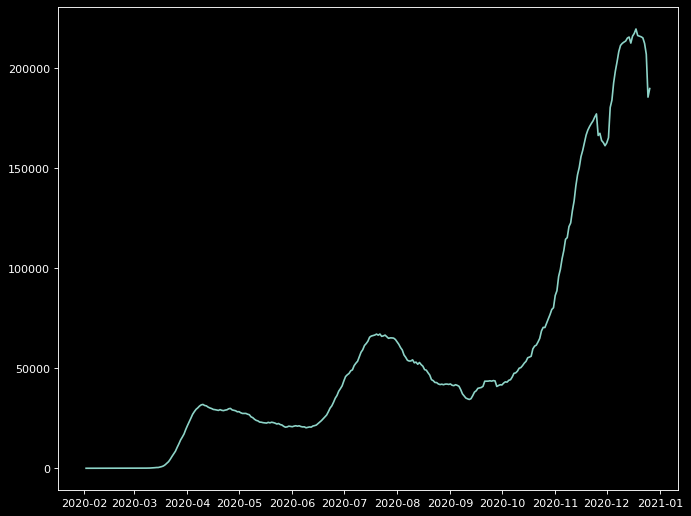

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/28/20


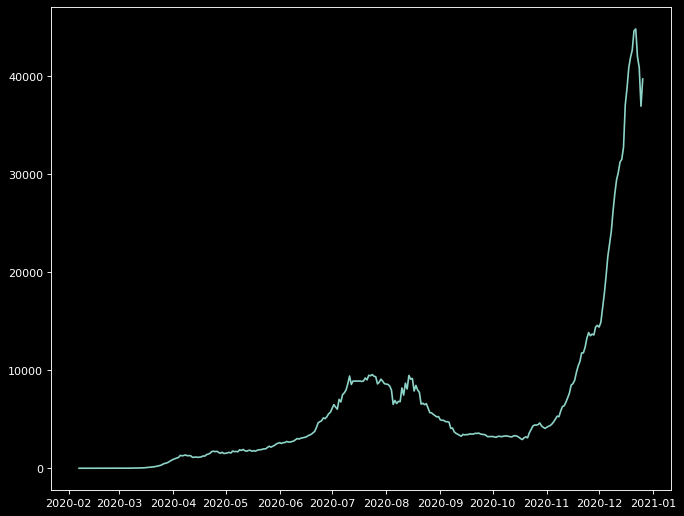

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/28/20


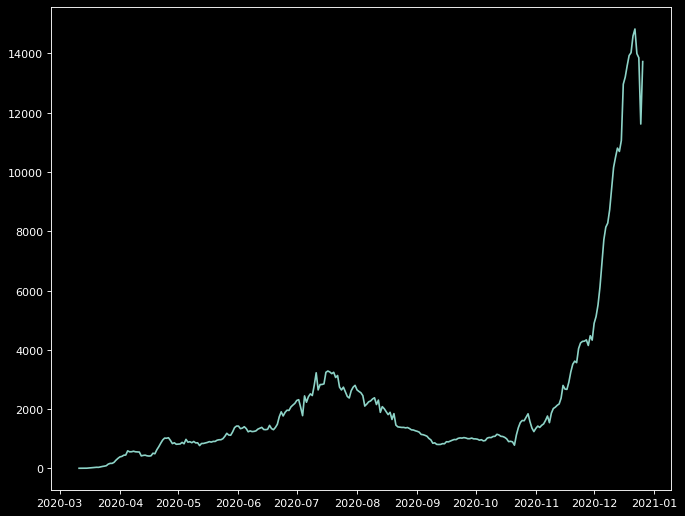

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()